### Regression lines

* Regression equation expresses relationship between one or more predictor variables and a dependent variable.  

$Y = B_o + B_1*X_1 + B2*X_2 + \epsilon$ 

Shorthand 
* $Y = BX + \epsilon$ and 
* $BX = B_0*1 + \sum_i B_i*X_i$


* OLS regression takes observations of the X and Y variables and estimates the B coefficients in equation (1) that minimize the sum of the squared residuals. 

* As we know, regression tells us both the magnitude and the direction of a relationship between our independent and dependent variables.

* $m = r\frac{s_y}{s_x}$

![](./resources/calc-m.png)

### Our first regression

In [37]:
import pandas as pd

poverty_df = pd.read_excel('./resources/Poverty.xls')
poverty_df.set_index('Country')

poverty_df['GNP'] = poverty_df.GNP.replace('*', 0)
poverty_df['GNP'] = poverty_df.GNP.astype('int64')
poverty_df

,BirthRt,DeathRt,InfMort,LExpM,LExpF,GNP,Region,Country
0,24.7,5.7,30.8,69.6,75.50,600,1,Albania
1,12.5,11.9,14.4,68.3,74.70,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.70,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.90,0,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.80,2780,1,Hungary
5,14.3,10.2,16.0,67.2,75.70,1690,1,Poland
6,13.6,10.7,26.9,66.5,72.40,1640,1,Romania
7,14.0,9.0,20.2,68.6,74.50,0,1,Yugoslavia
8,17.7,10.0,23.0,64.6,74.00,2242,1,USSR
9,15.2,9.5,13.1,66.4,75.90,1880,1,Byelorussian_SSR


In [12]:
# coerce the datatype

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f69128>,
      dtype=object)

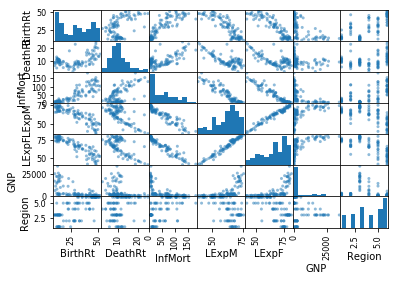

In [38]:
pd.plotting.scatter_matrix(poverty_df)

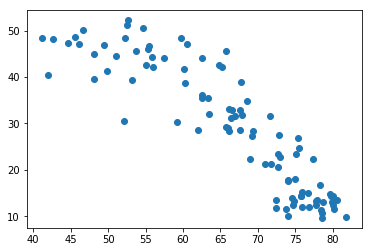

In [39]:
import matplotlib.pyplot as plt

plt.scatter(poverty_df['LExpF'], poverty_df['BirthRt'])

In [41]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [55]:
model = LinearRegression(fit_intercept=True)
model.fit(poverty_df.LExpF[:, np.newaxis], poverty_df.BirthRt)

model.coef_
# array([-1.1009472])

model.intercept_
# 102.05880299118186

102.05880299118186

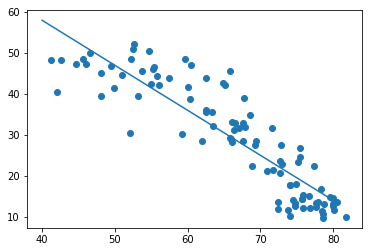

In [60]:
x_values = np.linspace(40, 80, 1000)

y_values = model.predict(x_values[:, np.newaxis])
plt.scatter(poverty_df.LExpF, poverty_df.BirthRt)
plt.plot(x_values, y_values)

* $ BirthRt = -1.1*LifeExpF + 102$


* For every increase in F life expectancy there is an associated 1.1 decrease in birthrate

### Multiple regression

In [14]:
# Adding birthrate = B_1(infant mortality)

In [16]:
# scatter'InfMort', 'BirthRt'

In [65]:
model = LinearRegression(fit_intercept=True)
model.fit(poverty_df[["LExpF", "InfMort"]], poverty_df.BirthRt)
model.coef_

array([-1.04877186,  0.01306832])

In [ ]:
birthrt = lexpf*-1.04 + infmort*.013

### R squared

#### What is $r^2$

* So far we have described the relationship between the two variables but we have not drawn a line between them 

* Now we know that we can use ordinary least squares to draw a line between them, we can evaluate the influence of that line
* $ R^2 = ESS/TSS $

* R^2 - this is the percentage of variation of the dependent variable that is explained by the predictor variables. 

$ RSS = 1 - SSE/TSS$

![](./resources/r-squared-visual.png)

In [ ]:
[]
[]
[]



#### Problems with $r^2$

1. You can always increase $R^2$ by adding to set of dependent variables even if the added variables are chosen at random.  

So people use "adjusted $R^2"$

$R^2_a = 1 - \frac{SSE_R/(n-k-1)}{SSE_T/(n-1)}$

2. You should not judge the performance of a regression by examining R^2 in isolation 

* A regression of R^2 can still be informative.  It's the extent to which the dependent variables explain the independent variables.  So a small $R^2$ with a variable - there is something still explained.

* Consider stock market performance.

#### Trending data

For example, suppose we have GDP and US population.  You regress past GDP on US population and obtain R^2 = .90.  
* But this is because there is a trend variable.  GDP tends to go up overtime and population tends to go up over time.    
* Or firm revenues and firm size, well as firms get bigger of course they tend to make more money.  

Basically we want to control for that trend 

1. Find the trend 
2. Find a measure of that trend 
3. Run the OLS including the trend variable 

#### Benchmarks

* .40 or .50 is quite good
* If modeling profits, then .20 or .30 is high

So the key questoin is if have learned something valuable

### Hypothesis Testing

* Null hypothesis is that predictor variable has no effect on the dependent variable
* Null hypothesis is that the coefficient on the predictor variable is zero

> **Significance level of the coefficient**: The probability of observing such a large coefficient or larger if the predictor variable were zero. 

> "The coefficient is significant at p < .05"

When sample sizes run into the thousands, many statisticians decrease the significance threshold
to .01. 

In [67]:
import statsmodels.api as sm

target = poverty_df.InfMort
X = poverty_df[["LExpF", "BirthRt"]].values
X2 = sm.add_constant(X)
est = sm.OLS(target, X2)
est2 = est.fit()

print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                InfMort   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     491.8
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.63e-50
Time:                        14:21:23   Log-Likelihood:                -390.19
No. Observations:                  97   AIC:                             786.4
Df Residuals:                      94   BIC:                             794.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        312.2998     25.097     12.444      0.0

### Consider effect size


1. What is a one to two standard deviation change the predictor variable 
 * So can see the impact of typical changes
 
2. Remember that you can compute the effect with $\Delta X * B_x$

#### Resources

[Interpret UCLA](https://stats.idre.ucla.edu/stata/output/regression-analysis-2/)

[Interpret Stats Princeton](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#ptse)

[Poverty Dataset](https://www2.stetson.edu/~jrasp/data.htm)

[Linear Regression in Python](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

[Understanding R^2](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/r-squared-sometimes-a-square-is-just-a-square)

[NonLinear Regression](https://onlinecourses.science.psu.edu/stat501/node/324/)